In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv"

In [ ]:
df = pd.read_csv(DATASET)

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##Исследование данных

In [ ]:
df.shape #размер дата сета

(4177, 9)

Посмотрим информацию о данных

In [ ]:
df.info #информация о данных

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125           NaN          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.duplicated().sum() #проверка дубликатов

0

In [ ]:
df.isnull().mean() * 100 #нулевые значения

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

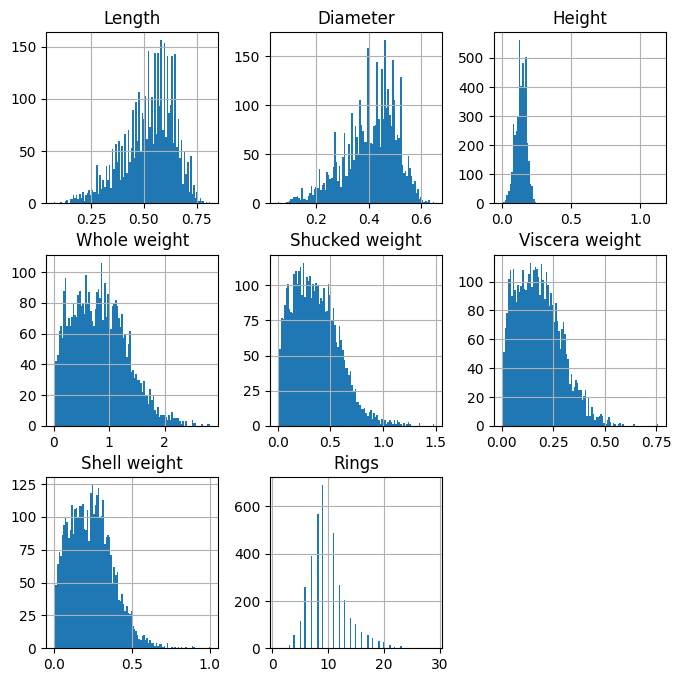

In [ ]:
df.hist(bins=100, figsize=(8,8));

Работает с нулевыми значениями. В столбцах ... заполним нулевые значения медианным

In [ ]:
median_Diameter = df["Diameter"].median() #поиск и заполнение пропусков медианным значением по столбцу 'Diameter'

df["Diameter"].fillna(median_Diameter, inplace=True)

In [ ]:
print(median_Diameter) #какое медианное значение столбца 'Diameter'

0.425


In [ ]:
median_Whole_weight = df["Whole weight"].median() #поиск и заполнение пропусков медианным значением по столбцу 'Whole weight'

df["Whole weight"].fillna(median_Whole_weight, inplace=True)

median_Shell_weight = df["Shell weight"].median() #поиск и заполнение пропусков медианным значением по столбцу 'Shell weight'

df["Shell weight"].fillna(median_Shell_weight, inplace=True)

In [ ]:
print(median_Whole_weight, median_Shell_weight)

0.7985 0.235


In [ ]:
df.isnull().mean() * 100 #нулевые значения

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

Заполнили нулевые значения медианным. В столбце Diameter - 0,425;
Whole weight - 0.7985; Shell weight - 0.235

In [ ]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [ ]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Sex
Sex,1.0


Построить матрицу не получается, нет пары категориальных признаков

<ipython-input-18-57def231a249>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman') #Матрица спирмена


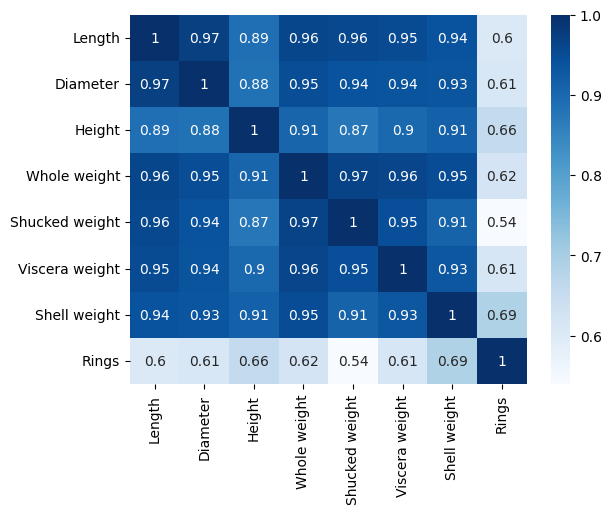

In [ ]:
corr = df.corr(method='spearman') #Матрица спирмена

sns.heatmap(corr, cmap="Blues", annot=True);

<ipython-input-19-d3d581adf2a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall') #Матрица Кенадала


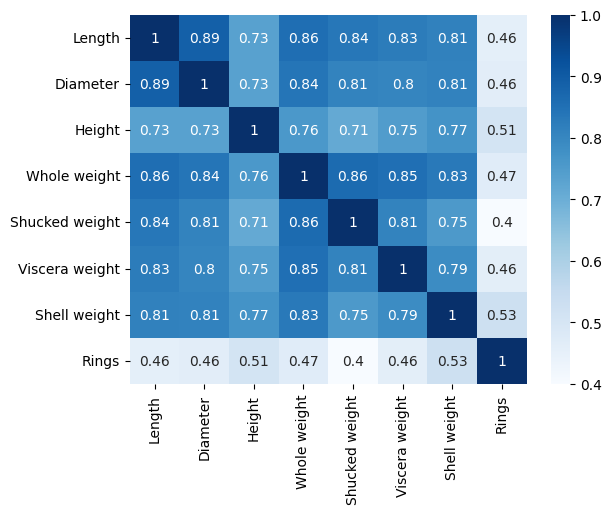

In [ ]:
corr = df.corr(method='kendall') #Матрица Кенадала

sns.heatmap(corr, cmap="Blues", annot=True);

<ipython-input-20-9ada10f240a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() # Матрица Пирсона


<Axes: >

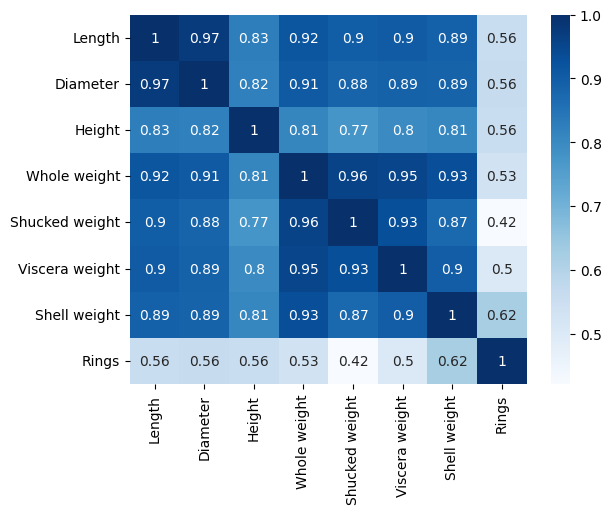

In [ ]:
corr = df.corr() # Матрица Пирсона

sns.heatmap(corr, cmap='Blues', annot = True)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
Data = [] #ANOVA

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


По данной табличке видно, что наш единственный категориальный признак "Sex" коррелирует со всеми остальными

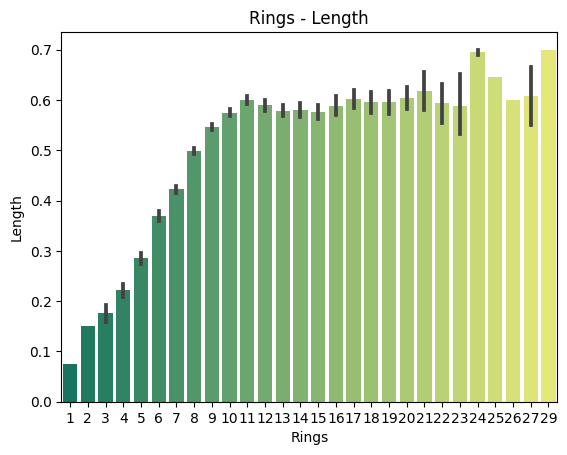

In [ ]:
plt.figure()

sns.barplot(x='Rings', y='Length', data = df, palette='summer')
plt.title('Rings - Length')
plt.show();

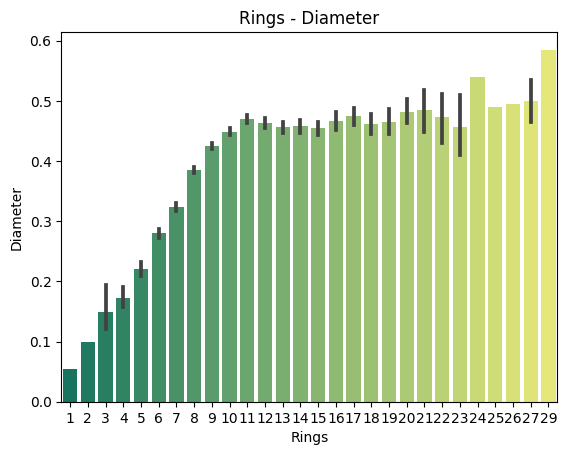

In [ ]:
plt.figure()

sns.barplot(x='Rings', y='Diameter', data = df, palette='summer')
plt.title('Rings - Diameter')
plt.show();

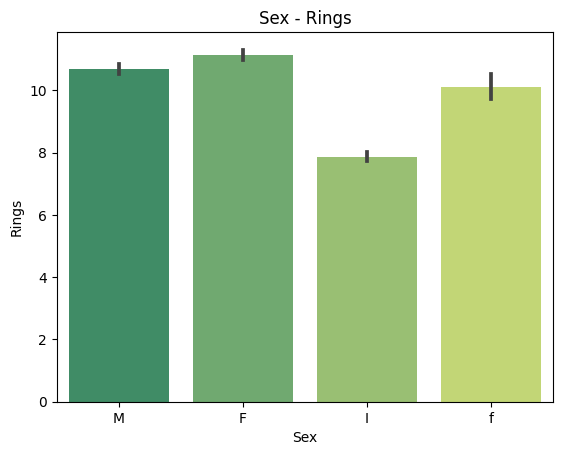

In [ ]:
plt.figure()

sns.barplot(x='Sex', y='Rings', data = df, palette='summer')
plt.title('Sex - Rings')
plt.show();

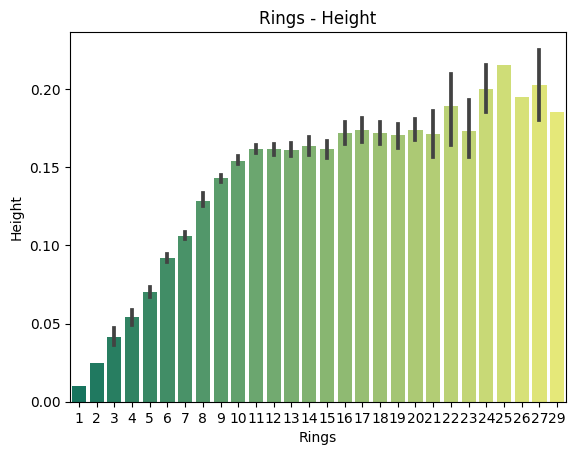

In [ ]:
plt.figure()

sns.barplot(x='Rings', y='Height', data = df, palette='summer')
plt.title('Rings - Height')
plt.show();

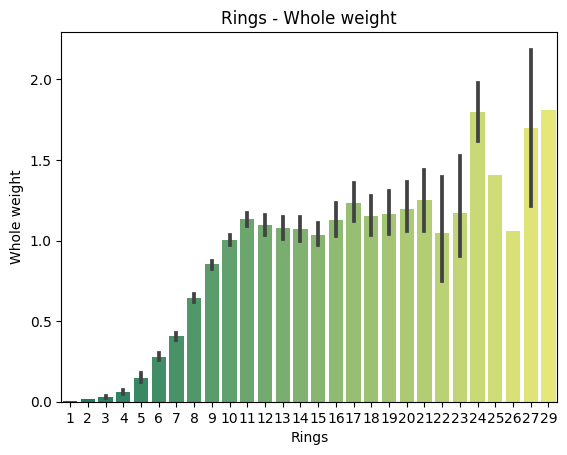

In [ ]:
plt.figure()

sns.barplot(x='Rings', y='Whole weight', data = df, palette='summer')
plt.title('Rings - Whole weight')
plt.show();

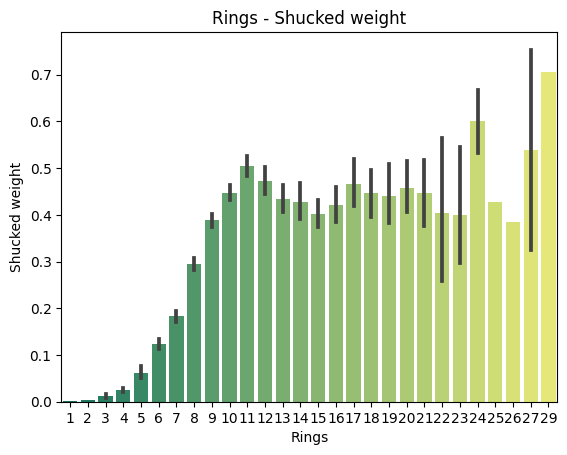

In [ ]:
plt.figure()

sns.barplot(x='Rings', y='Shucked weight', data = df, palette='summer')
plt.title('Rings - Shucked weight')
plt.show();

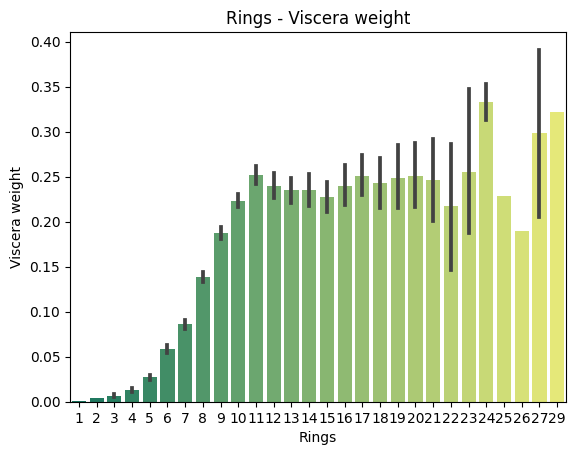

In [ ]:
plt.figure()

sns.barplot(x='Rings', y='Viscera weight', data = df, palette='summer')
plt.title('Rings - Viscera weight')
plt.show();

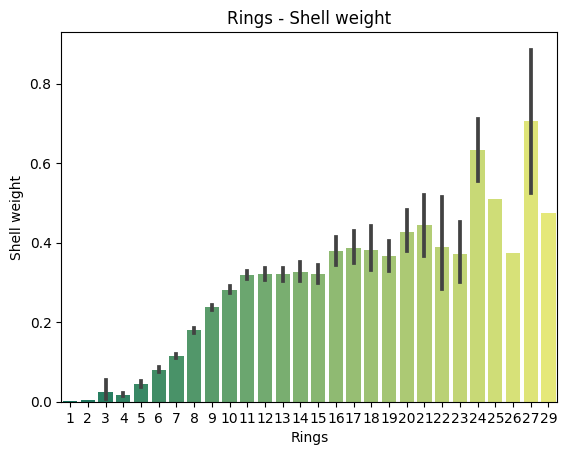

In [ ]:
plt.figure()

sns.barplot(x='Rings', y='Shell weight', data = df, palette='summer')
plt.title('Rings - Shell weight')
plt.show();

значения переменных связанных с целевой переменной плавно возрастают с увеличением целевой переменной

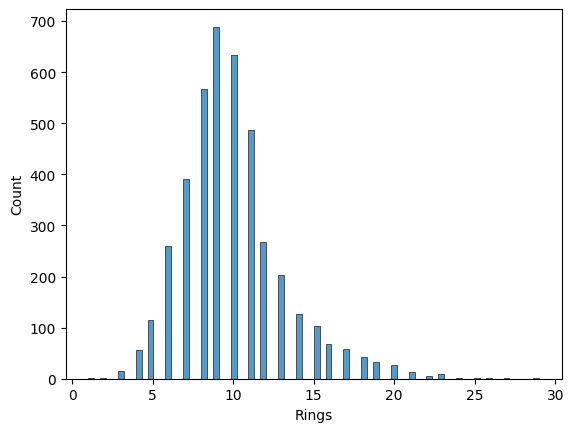

In [ ]:
sns.histplot(df['Rings']) #Посмотрим распределние переменной "Rings"
plt.show()

Распределение целевой переменной похоже на нормальное распределение со смещением в право
Возможные проблемы при обучении модели возникают, так как они неустойчивы к несбалансированным данным и чувствительны к выбросам
Некоторые статистические методы и модели могут давать неточные результаты

In [ ]:
df_big = df.copy()

for i in range(250):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone_big.csv", index=False)

In [ ]:
df_big.shape

(1048427, 9)

In [ ]:
!pip install polars

import polars as pl

Сравним загрузку данных

In [ ]:
%%time

df_pl = pl.read_csv("abalone_big.csv")

CPU times: user 796 ms, sys: 137 ms, total: 933 ms
Wall time: 605 ms


In [ ]:
%%time

df = pd.read_csv("abalone_big.csv")

CPU times: user 1.03 s, sys: 65.2 ms, total: 1.09 s
Wall time: 1.15 s


Библиотке polars справилась быстрее

Сравним библиотеки по скорости агрегации данных

In [ ]:
%%time

df_pl[['Diameter', 'Rings']]

CPU times: user 1.13 ms, sys: 0 ns, total: 1.13 ms
Wall time: 7.76 ms


Diameter,Rings
f64,i64
0.365,15
0.265,7
0.42,9
0.365,10
0.255,7
0.3,8
0.415,20
0.425,16
0.37,9


In [ ]:
%%time

df[['Diameter', 'Rings']]

CPU times: user 9.37 ms, sys: 0 ns, total: 9.37 ms
Wall time: 16.6 ms


,Diameter,Rings
0,0.365,15
1,0.265,7
2,0.420,9
3,0.365,10
4,0.255,7
...,...,...
1048422,0.450,11
1048423,0.440,10
1048424,0.475,9
1048425,0.485,10


Polars опять быстрее более чем в 2 раза

Проверим фильтрацию

In [ ]:
%%time

df_pl.filter(pl.col('Rings') > 10)

CPU times: user 38.2 ms, sys: 10.2 ms, total: 48.4 ms
Wall time: 61.3 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""F""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""F""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""F""",0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19
"""F""",0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14
"""M""",0.49,0.38,0.135,0.5415,0.2175,0.095,0.19,11
"""M""",0.5,0.4,0.13,0.6645,0.258,0.133,0.24,12
"""M""",0.355,0.28,0.095,0.2455,0.0955,0.062,0.075,11
"""F""",0.565,0.44,0.155,0.9395,0.4275,0.214,0.27,12


In [ ]:
%%time

df.query('Rings > 10')

CPU times: user 31.9 ms, sys: 11.2 ms, total: 43.1 ms
Wall time: 48.5 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
...,...,...,...,...,...,...,...,...,...
1048398,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11
1048410,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
1048411,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


С фильтрацие pandas справился быстрее